In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]    
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

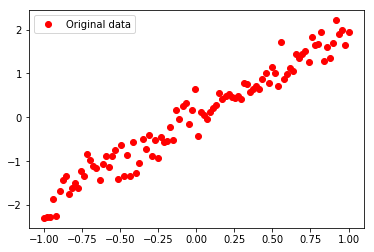

In [3]:
#生成模拟数据
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
#图形显示
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [4]:
tf.reset_default_graph()

In [5]:
# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

# 前向结构
z = tf.multiply(X, W) + b
# 将预测值以直方图显示
tf.summary.histogram('z', z)  

<tf.Tensor 'z:0' shape=() dtype=string>

In [6]:
# 反向优化
cost = tf.reduce_mean(tf.square(Y - z))
# 将损失以标量显示
tf.summary.scalar('loss_function', cost)  
learning_rate = 0.01
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)  

In [7]:
# 初始化变量
init = tf.global_variables_initializer()
# 参数设置
training_epochs = 20
display_step = 2

Epoch: 1 cost= 0.19445118 W= [1.4077027] b= [0.17537044]
Epoch: 3 cost= 0.07593762 W= [1.8042078] b= [0.07127038]
Epoch: 5 cost= 0.065415815 W= [1.9119594] b= [0.03072993]
Epoch: 7 cost= 0.06451125 W= [1.9399084] b= [0.02001824]
Epoch: 9 cost= 0.06440109 W= [1.9471375] b= [0.0172444]
Epoch: 11 cost= 0.06438091 W= [1.9490061] b= [0.0165273]
Epoch: 13 cost= 0.064376235 W= [1.9494896] b= [0.01634178]
Epoch: 15 cost= 0.064375065 W= [1.9496142] b= [0.01629399]
Epoch: 17 cost= 0.06437477 W= [1.9496465] b= [0.01628155]
Epoch: 19 cost= 0.06437469 W= [1.9496546] b= [0.0162784]
 Finished!
cost= 0.06437468 W= [1.9496561] b= [0.01627784]


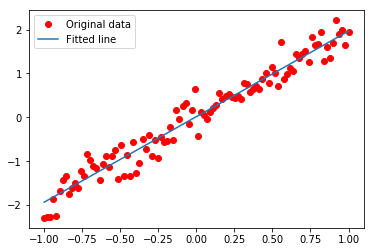

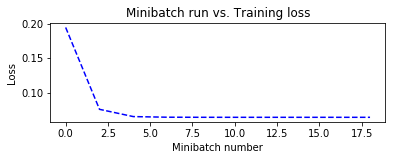

x=0.2，z= [0.40620908]


In [8]:
# 启动session
with tf.Session() as sess:
    sess.run(init)

    merged_summary_op = tf.summary.merge_all()  # 合并所有summary
    # 创建summary_writer，在迭代中将summary的值运行生成出来，同时添加到文件里
    summary_writer = tf.summary.FileWriter(
        'log/mnist_with_summaries', sess.graph)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

            # 生成summary
            summary_str = sess.run(merged_summary_op, feed_dict={X: x, Y: y})
            summary_writer.add_summary(summary_str, epoch)  # 将summary 写入文件

        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", epoch+1,
                  "cost=", loss,
                  "W=", sess.run(W),
                  "b=", sess.run(b))
            if not (loss == "NA"):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)

    print(" Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}),
          "W=", sess.run(W),
          "b=", sess.run(b))
    #print ("cost:",cost.eval({X: train_X, Y: train_Y}))

    # 图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')

    plt.show()

    print("x=0.2，z=", sess.run(z, feed_dict={X: 0.2}))

In [ ]:
# 在log目录下打开终端，输入
# tensorboard --logdir mnist_with_summaries

![模型操作相关函数2](./img/模型操作相关函数2.jpg)